In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
images = ["all-mias/"+x for x in os.listdir("all-mias")]
images

['all-mias/mdb149.pgm',
 'all-mias/mdb161.pgm',
 'all-mias/mdb175.pgm',
 'all-mias/mdb029.pgm',
 'all-mias/mdb015.pgm',
 'all-mias/mdb001.pgm',
 'all-mias/mdb217.pgm',
 'all-mias/mdb203.pgm',
 'all-mias/mdb202.pgm',
 'all-mias/mdb216.pgm',
 'all-mias/mdb014.pgm',
 'all-mias/mdb028.pgm',
 'all-mias/mdb174.pgm',
 'all-mias/mdb160.pgm',
 'all-mias/mdb148.pgm',
 'all-mias/mdb189.pgm',
 'all-mias/mdb176.pgm',
 'all-mias/mdb162.pgm',
 'all-mias/mdb002.pgm',
 'all-mias/mdb016.pgm',
 'all-mias/mdb228.pgm',
 'all-mias/mdb200.pgm',
 'all-mias/mdb214.pgm',
 'all-mias/mdb215.pgm',
 'all-mias/mdb201.pgm',
 'all-mias/mdb229.pgm',
 'all-mias/mdb017.pgm',
 'all-mias/mdb003.pgm',
 'all-mias/mdb163.pgm',
 'all-mias/mdb177.pgm',
 'all-mias/mdb188.pgm',
 'all-mias/mdb198.pgm',
 'all-mias/mdb173.pgm',
 'all-mias/mdb167.pgm',
 'all-mias/mdb007.pgm',
 'all-mias/mdb013.pgm',
 'all-mias/mdb205.pgm',
 'all-mias/mdb211.pgm',
 'all-mias/mdb239.pgm',
 'all-mias/mdb238.pgm',
 'all-mias/mdb210.pgm',
 'all-mias/mdb20

In [26]:
df = pd.read_csv("info.txt", delimiter=" ")
df["filename"] = "files/" + df.REFNUM +".png"
df.CLASS.unique()

array(['CIRC', 'NORM', 'MISC', 'ASYM', 'ARCH', 'SPIC', 'CALC'],
      dtype=object)

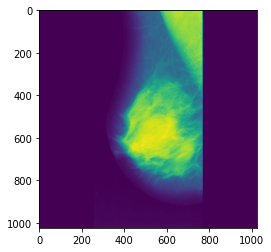

In [27]:
import matplotlib.image as mpimg
img = mpimg.imread(df.filename[0])
plt.imshow(img)


In [28]:
from PIL import Image
for x in df.REFNUM:
    Image.open("all-mias/%s.pgm"%x).save("files/%s.png"%x)
    

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df["SEVERITY"] = df["SEVERITY"].fillna("None")
train_df = df.loc[:len(df)*.6-1]
validation_df = df.loc[len(df)*.6:]
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col = 'filename',
        y_col = 'SEVERITY',
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe=validation_df,
        x_col = 'filename',
        y_col = 'SEVERITY',
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 198 validated image filenames belonging to 3 classes.
Found 132 validated image filenames belonging to 3 classes.


In [30]:
import tensorflow as tf
num_classes = 3

from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import optimizers
from keras import losses

model = Sequential()

#     model.add(Conv2D(32, (3, 3), input_shape=(rows, cols, 1)))
#     model.add(Activation('relu'))
#     model.add(Conv2D(32, (3, 3)))
#     model.add(Activation('relu'))
#     model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1)))
#     model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1),input_shape=(300,300,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 15 ,
          steps_per_epoch = len(train_df)/32, # train_files/batch_size
          validation_steps = len(validation_df)/32, # valid_files/batch_size 
          callbacks = [callbacks]) 


#print(model.predict(x_test))
#model.save('breast_cance_model.h5')

save_dictionary('history1.dat', history.history)


Epoch 1/15


UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node sequential_5/activation_3/Relu (defined at <ipython-input-35-8d255fef5ff0>:2) ]] [Op:__inference_train_function_1742]

Function call stack:
train_function


In [95]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

In [96]:
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 15 ,
          steps_per_epoch = len(train_df)/32, # train_files/batch_size
          validation_steps = len(validation_df)/32, # valid_files/batch_size 
          callbacks = [callbacks]) 

Epoch 1/15
6/6 [==============================] - 18s 3s/step - loss: 1.1957 - accuracy: 0.5039 - val_loss: 1.0146 - val_accuracy: 0.6439
Epoch 2/15
6/6 [==============================] - 20s 3s/step - loss: 0.9643 - accuracy: 0.6225 - val_loss: 0.9883 - val_accuracy: 0.6439
Epoch 3/15
6/6 [==============================] - 20s 4s/step - loss: 0.9089 - accuracy: 0.6519 - val_loss: 0.9901 - val_accuracy: 0.6439
Epoch 4/15
6/6 [==============================] - 18s 3s/step - loss: 0.8741 - accuracy: 0.6426 - val_loss: 1.0052 - val_accuracy: 0.6439
Epoch 5/15
6/6 [==============================] - 20s 3s/step - loss: 0.8534 - accuracy: 0.6425 - val_loss: 1.0796 - val_accuracy: 0.5000
Epoch 6/15
6/6 [==============================] - 20s 3s/step - loss: 0.8330 - accuracy: 0.6251 - val_loss: 1.0986 - val_accuracy: 0.4924
Epoch 7/15
6/6 [==============================] - 20s 3s/step - loss: 0.8143 - accuracy: 0.6717 - val_loss: 1.0424 - val_accuracy: 0.5985
Epoch 8/15
6/6 [==================

In [110]:
from tensorflow.keras.preprocessing import image
import numpy as np
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)
def prediction(test_path):
    img = image.load_img(test_path , target_size = (300 , 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/300.0
        
    plt.title('Image')
    plt.axis('off')
    plt.imshow(img.squeeze())
        
    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]
        
    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

{0: 'B', 1: 'M', 2: 'None'}


Prediction Value:  0.6690539
Classified: M


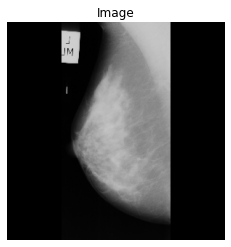

In [112]:
prediction(validation_df.iloc[1].filename)

In [113]:
validation_df.iloc[1]

REFNUM                  mdb197
BG                           D
CLASS                     NORM
SEVERITY                  None
X                          NaN
Y                          NaN
RADIUS                     NaN
Unnamed: 7                 NaN
filename      files/mdb197.png
Name: 199, dtype: object